<a href="https://colab.research.google.com/github/perfectthabangmnisi2019-gif/nextjs-project-template/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 — A Tour of ML Classifiers



In [2]:
%pip install -q --upgrade pip
%pip install -q scikit-learn numpy pandas matplotlib pydotplus graphviz

## 1) Imports & Helper Function

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(1)


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=str(cl), edgecolor='black')
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.xlabel('feature 1 (std or raw)')
    plt.ylabel('feature 2 (std or raw)')
    plt.title('Decision Regions')
    plt.show()

## 2) Exercise 1 — Data Preparation & Choosing a Classifier



In [4]:

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print('Class distribution in y_train:', np.bincount(y_train))
print('Train shape:', X_train_std.shape, ' Test shape:', X_test_std.shape)

Class distribution in y_train: [35 35 35]
Train shape: (105, 2)  Test shape: (45, 2)


In [5]:

Xm, ym = make_moons(n_samples=300, noise=0.3, random_state=1)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, test_size=0.3, random_state=1, stratify=ym
)

sc_m = StandardScaler().fit(Xm_train)
Xm_train_std = sc_m.transform(Xm_train)
Xm_test_std = sc_m.transform(Xm_test)

Xm_combined_std = np.vstack((Xm_train_std, Xm_test_std))
ym_combined = np.hstack((ym_train, ym_test))

print('Moons class distribution ym_train:', np.bincount(ym_train))
print('Moons Train shape:', Xm_train_std.shape, ' Test shape:', Xm_test_std.shape)

Moons class distribution ym_train: [105 105]
Moons Train shape: (210, 2)  Test shape: (90, 2)


## 3) Exercise 2 — Perceptron (recap)



Perceptron (eta0=0.1) Accuracy on Iris test: 0.9777777777777777


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


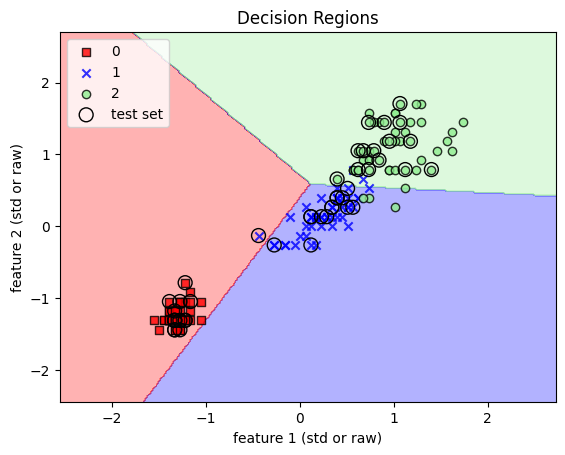

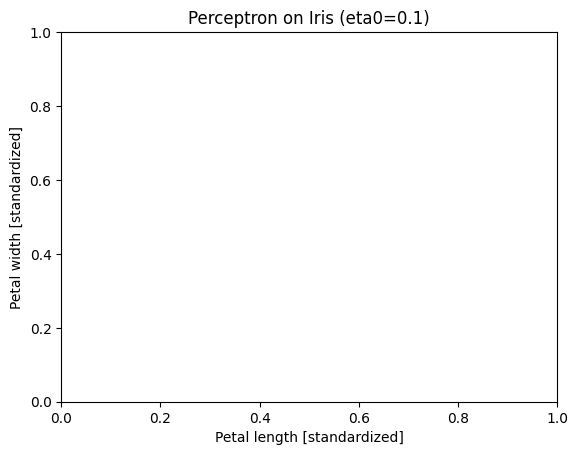

eta0=0.01 -> Accuracy: 0.956
eta0=0.1  -> Accuracy: 0.978
eta0=1.0  -> Accuracy: 0.889


In [6]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1).fit(X_train_std, y_train)
y_pred_ppn = ppn.predict(X_test_std)
print('Perceptron (eta0=0.1) Accuracy on Iris test:', accuracy_score(y_test, y_pred_ppn))

test_idx = range(len(X_train_std), len(X_train_std)+len(X_test_std))
plot_decision_regions(np.vstack((X_train_std, X_test_std)),
                      np.hstack((y_train, y_test)),
                      classifier=ppn, test_idx=test_idx)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Perceptron on Iris (eta0=0.1)')
plt.savefig('perceptron_iris_eta0_0.1.png', dpi=150, bbox_inches='tight')
plt.show()

for lr in [0.01, 0.1, 1.0]:
    model = Perceptron(max_iter=40, eta0=lr, random_state=1).fit(X_train_std, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_std))
    print(f'eta0={lr:<4} -> Accuracy: {acc:.3f}')

Perceptron (eta0=0.1) Accuracy on Moons test: 0.5888888888888889


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


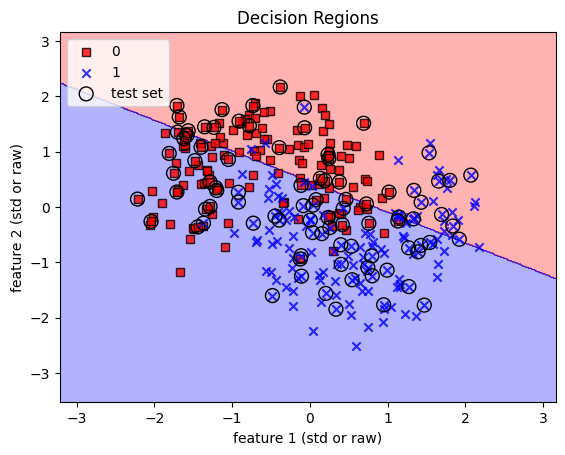

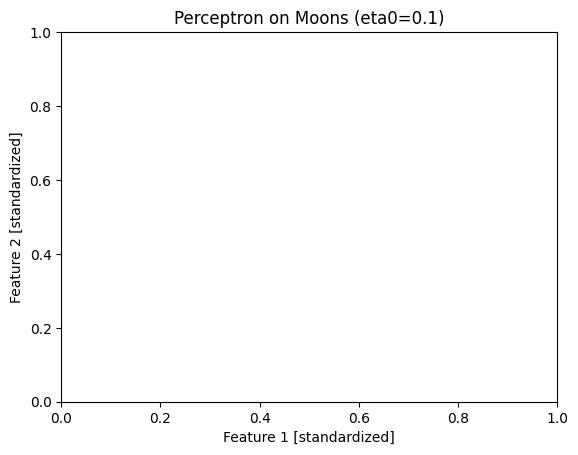

In [7]:

ppn_m = Perceptron(max_iter=40, eta0=0.1, random_state=1).fit(Xm_train_std, ym_train)
ym_pred_ppn = ppn_m.predict(Xm_test_std)
print('Perceptron (eta0=0.1) Accuracy on Moons test:', accuracy_score(ym_test, ym_pred_ppn))

test_idx_m = range(len(Xm_train_std), len(Xm_train_std)+len(Xm_test_std))
plot_decision_regions(np.vstack((Xm_train_std, Xm_test_std)),
                      np.hstack((ym_train, ym_test)),
                      classifier=ppn_m, test_idx=test_idx_m)
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Perceptron on Moons (eta0=0.1)')
plt.savefig('perceptron_moons_eta0_0.1.png', dpi=150, bbox_inches='tight')
plt.show()

## 4) Exercise 3 — Logistic Regression
Concepts: probability modeling, L2 regularization via **C** (inverse of strength).

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Logistic Regression (C=100) Accuracy: 0.9777777777777777
Probabilities for first 3 test samples:
 [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


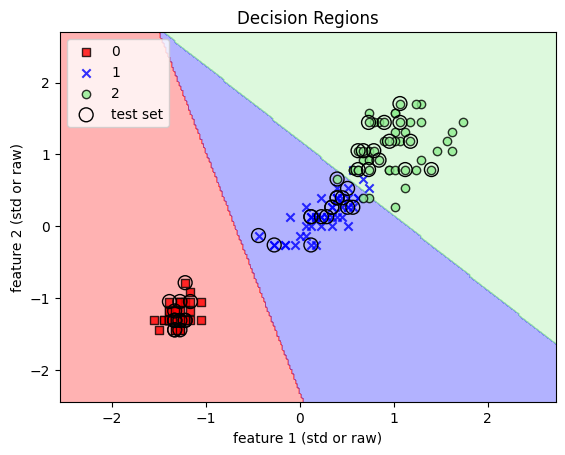

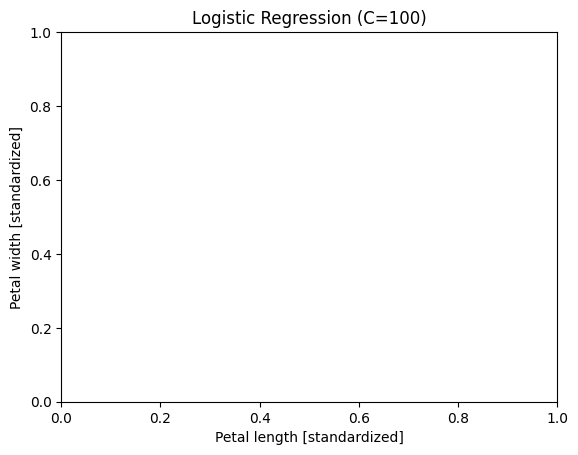

In [8]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr').fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
print('Logistic Regression (C=100) Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Probabilities for first 3 test samples:\n', lr.predict_proba(X_test_std[:3]))

test_idx = range(len(X_train_std), len(X_train_std)+len(X_test_std))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=test_idx)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Logistic Regression (C=100)')
plt.savefig('logreg_iris_C100.png', dpi=150, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


C=0.01   -> Accuracy: 0.689


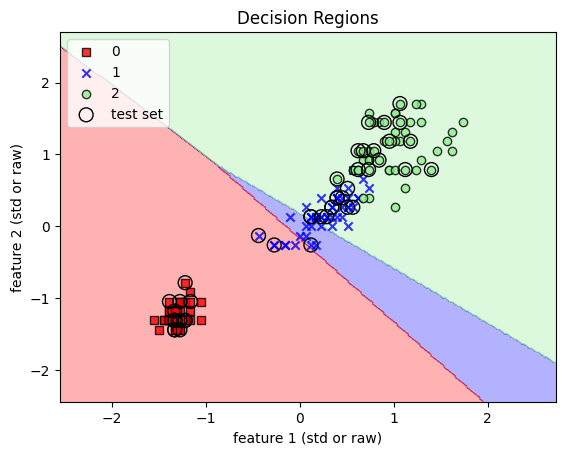

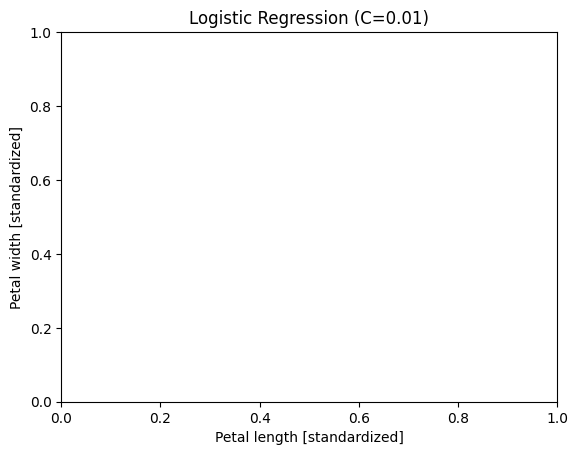

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


C=1      -> Accuracy: 0.978


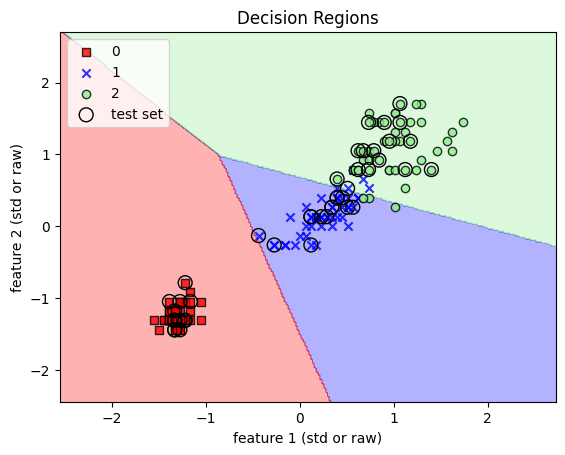

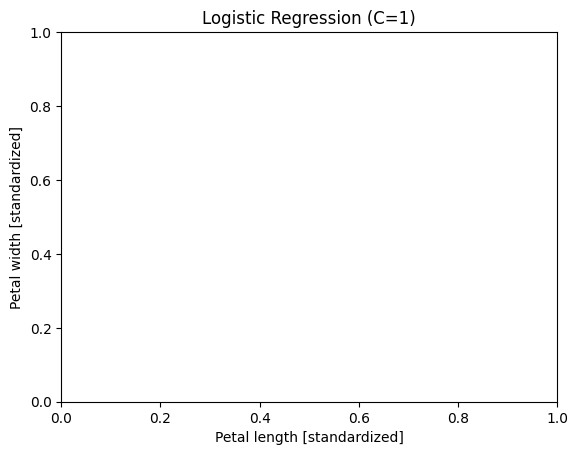

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


C=100    -> Accuracy: 0.978


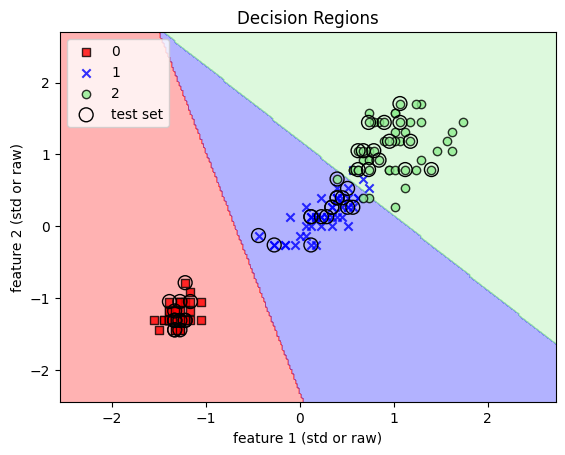

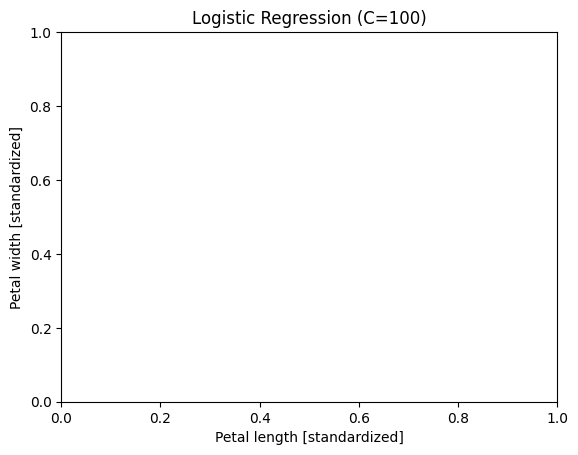

In [9]:

for C in [0.01, 1, 100]:
    clf = LogisticRegression(C=C, random_state=1, solver='lbfgs', multi_class='ovr').fit(X_train_std, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test_std))
    print(f'C={C:<6} -> Accuracy: {acc:.3f}')
    plot_decision_regions(X_combined_std, y_combined, classifier=clf, test_idx=range(len(X_train_std), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]'); plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={C})')
    plt.savefig(f'logreg_iris_C{C}.png', dpi=150, bbox_inches='tight')
    plt.show()

## 5) Exercise 4 — Linear SVM
Concepts: maximum margin, soft margin controlled by **C**.

Linear SVM (C=1.0) Accuracy: 0.9777777777777777


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


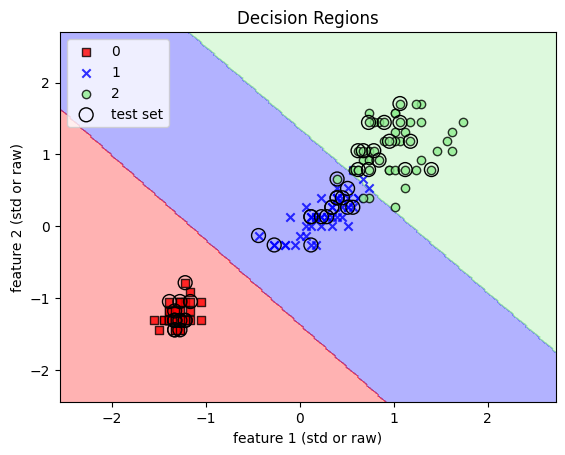

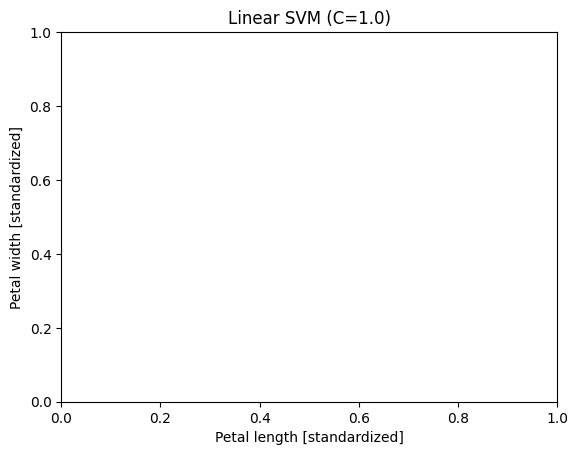

Linear SVM (C=100) Accuracy: 0.9777777777777777


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


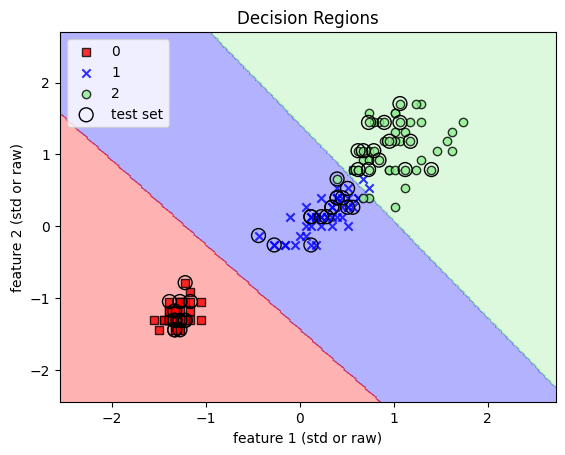

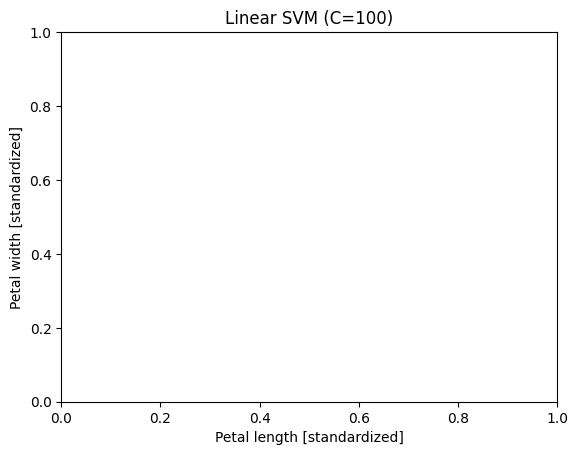

Number of support vectors per class: [ 2 13 11]
Support vectors shape: (26, 2)


In [10]:
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_std, y_train)
print('Linear SVM (C=1.0) Accuracy:', accuracy_score(y_test, svm.predict(X_test_std)))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]'); plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM (C=1.0)')
plt.savefig('svm_linear_C1.png', dpi=150, bbox_inches='tight')
plt.show()

# Increase C -> narrower margin, can overfit outliers
svm_C100 = SVC(kernel='linear', C=100.0, random_state=1).fit(X_train_std, y_train)
print('Linear SVM (C=100) Accuracy:', accuracy_score(y_test, svm_C100.predict(X_test_std)))
plot_decision_regions(X_combined_std, y_combined, classifier=svm_C100, test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]'); plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM (C=100)')
plt.savefig('svm_linear_C100.png', dpi=150, bbox_inches='tight')
plt.show()

# Support vectors
print('Number of support vectors per class:', svm.n_support_)
print('Support vectors shape:', svm.support_vectors_.shape)

## 6) Exercise 5 — Kernel SVM (RBF)
Concepts: kernel trick for nonlinear boundaries; **gamma** controls RBF width

RBF SVM (gamma=0.2, C=1) Accuracy on Moons: 0.8333333333333334


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


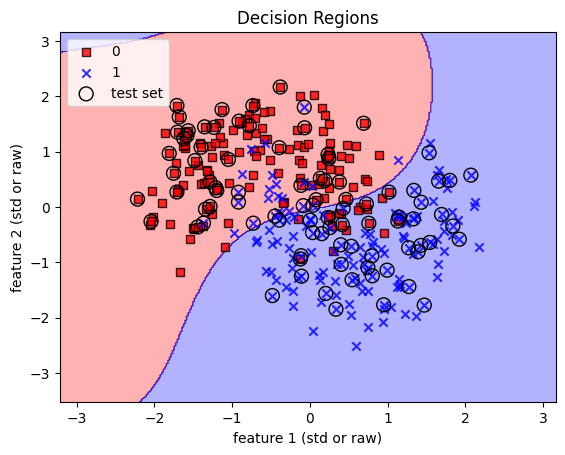

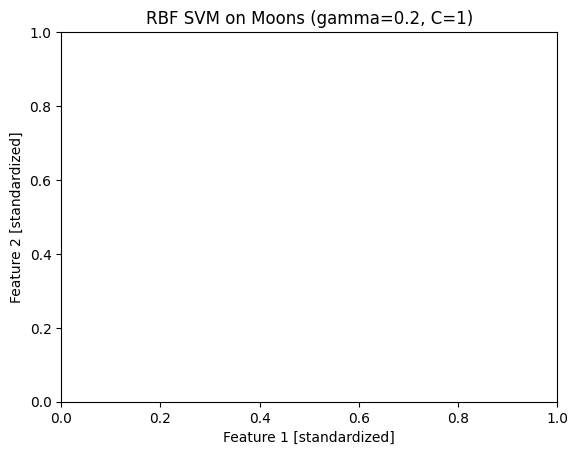

In [11]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0).fit(Xm_train_std, ym_train)
print('RBF SVM (gamma=0.2, C=1) Accuracy on Moons:', accuracy_score(ym_test, svm_rbf.predict(Xm_test_std)))
plot_decision_regions(Xm_combined_std, ym_combined, classifier=svm_rbf, test_idx=range(len(Xm_train_std), len(Xm_combined_std)))
plt.xlabel('Feature 1 [standardized]'); plt.ylabel('Feature 2 [standardized]')
plt.title('RBF SVM on Moons (gamma=0.2, C=1)')
plt.savefig('svm_rbf_moons_gamma0.2_C1.png', dpi=150, bbox_inches='tight')
plt.show()

gamma=0.01   -> Accuracy: 0.822


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


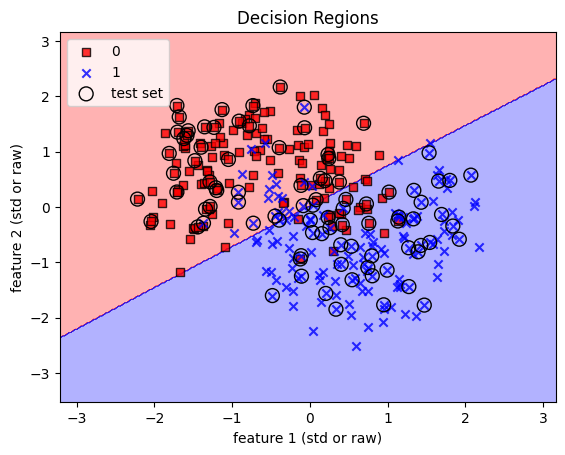

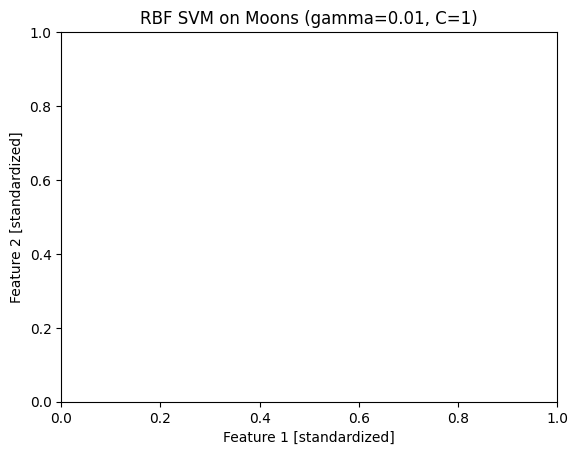

gamma=1      -> Accuracy: 0.900


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


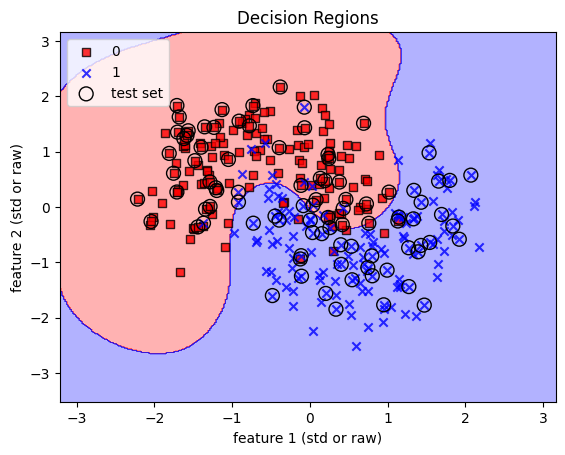

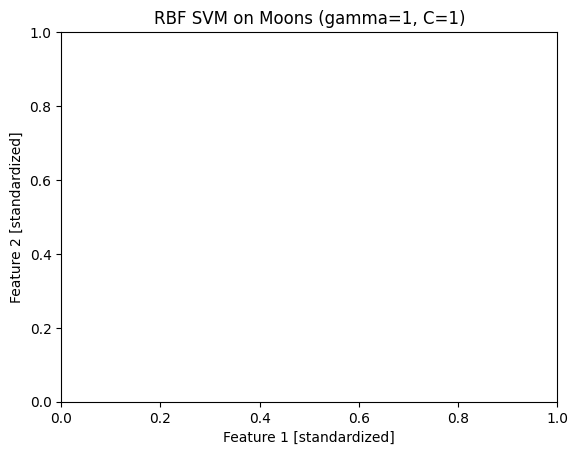

gamma=100    -> Accuracy: 0.789


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


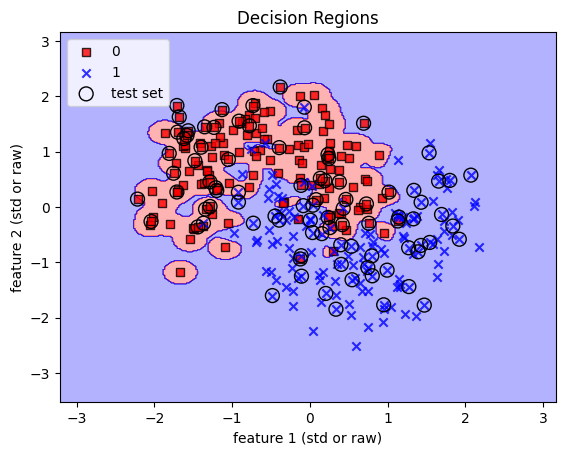

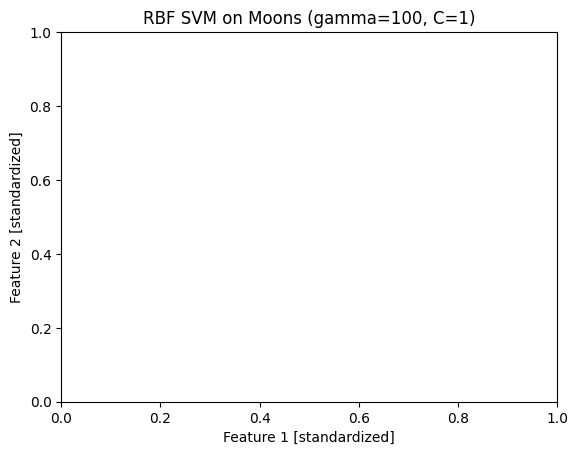

In [12]:

for gamma in [0.01, 1, 100]:
    clf = SVC(kernel='rbf', random_state=1, gamma=gamma, C=1.0).fit(Xm_train_std, ym_train)
    acc = accuracy_score(ym_test, clf.predict(Xm_test_std))
    print(f'gamma={gamma:<6} -> Accuracy: {acc:.3f}')
    plot_decision_regions(Xm_combined_std, ym_combined, classifier=clf, test_idx=range(len(Xm_train_std), len(Xm_combined_std)))
    plt.xlabel('Feature 1 [standardized]'); plt.ylabel('Feature 2 [standardized]')
    plt.title(f'RBF SVM on Moons (gamma={gamma}, C=1)')
    plt.savefig(f'svm_rbf_moons_gamma{gamma}_C1.png', dpi=150, bbox_inches='tight')
    plt.show()

Iris — Linear SVM acc: 0.978 | RBF SVM acc: 0.978


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


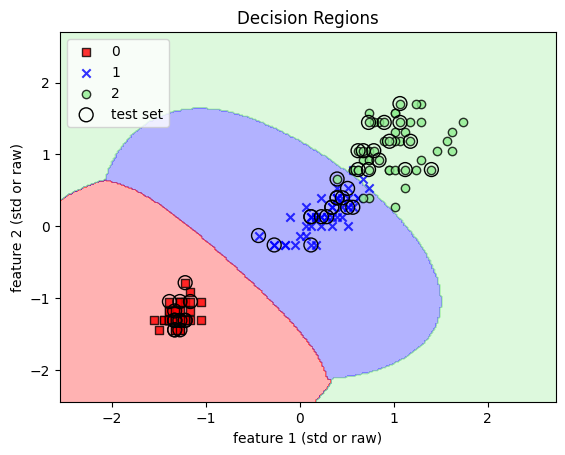

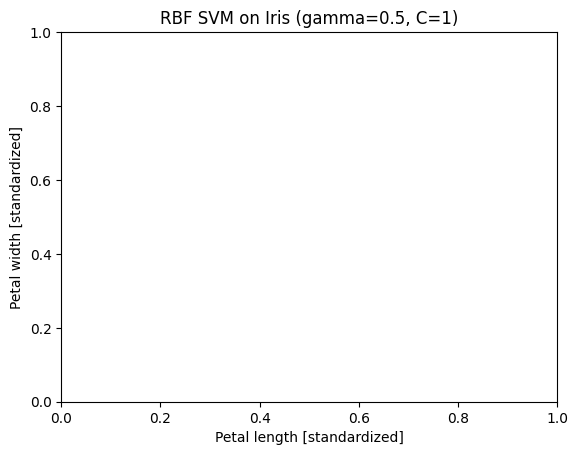

In [13]:

svm_rbf_iris = SVC(kernel='rbf', random_state=1, gamma=0.5, C=1.0).fit(X_train_std, y_train)
acc_rbf_iris = accuracy_score(y_test, svm_rbf_iris.predict(X_test_std))
acc_linear_iris = accuracy_score(y_test, svm.predict(X_test_std))
print(f'Iris — Linear SVM acc: {acc_linear_iris:.3f} | RBF SVM acc: {acc_rbf_iris:.3f}')

plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf_iris, test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]'); plt.ylabel('Petal width [standardized]')
plt.title('RBF SVM on Iris (gamma=0.5, C=1)')
plt.savefig('svm_rbf_iris_gamma0.5_C1.png', dpi=150, bbox_inches='tight')
plt.show()

## 7) Exercise 6 — Decision Trees
Concepts: Information gain (gini/entropy), pruning via `max_depth`.


Decision Tree (gini, max_depth=4) Accuracy: 0.9777777777777777


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


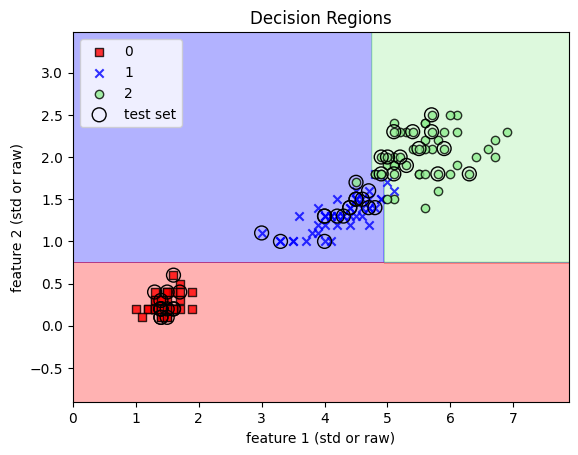

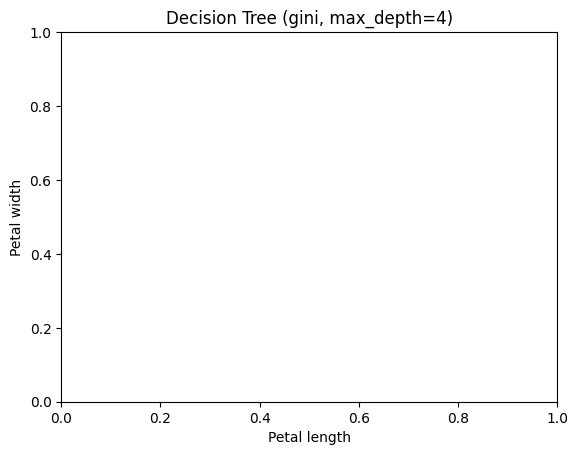

Exported Decision Tree to tree_iris_gini_depth4.png


In [14]:

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1).fit(X_train, y_train)
print('Decision Tree (gini, max_depth=4) Accuracy:', accuracy_score(y_test, tree.predict(X_test)))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length'); plt.ylabel('Petal width')
plt.title('Decision Tree (gini, max_depth=4)')
plt.savefig('tree_iris_gini_depth4_regions.png', dpi=150, bbox_inches='tight')
plt.show()


try:
    dot = export_graphviz(tree, filled=True, rounded=True,
                          class_names=iris.target_names.tolist(),
                          feature_names=['petal length', 'petal width'],
                          out_file=None)
    import pydotplus
    graph = pydotplus.graph_from_dot_data(dot)
    graph.write_png('tree_iris_gini_depth4.png')
    print('Exported Decision Tree to tree_iris_gini_depth4.png')
except Exception as e:
    print('Graphviz export failed, falling back to plot_tree(). Reason:', e)
    plt.figure(figsize=(8,6))
    plot_tree(tree, filled=True, feature_names=['petal length','petal width'],
              class_names=iris.target_names.tolist(), rounded=True)
    plt.title('Decision Tree (gini, depth=4)')
    plt.savefig('tree_iris_gini_depth4_fallback.png', dpi=150, bbox_inches='tight')
    plt.show()

In [15]:

for depth in [1,2,3,4,5,6,8,10]:
    g_tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1).fit(X_train, y_train)
    e_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1).fit(X_train, y_train)
    g_acc = accuracy_score(y_test, g_tree.predict(X_test))
    e_acc = accuracy_score(y_test, e_tree.predict(X_test))
    print(f'max_depth={depth:<2} | gini acc={g_acc:.3f} | entropy acc={e_acc:.3f}')

max_depth=1  | gini acc=0.667 | entropy acc=0.667
max_depth=2  | gini acc=0.956 | entropy acc=0.956
max_depth=3  | gini acc=0.978 | entropy acc=0.956
max_depth=4  | gini acc=0.978 | entropy acc=0.933
max_depth=5  | gini acc=0.978 | entropy acc=0.978
max_depth=6  | gini acc=0.978 | entropy acc=0.978
max_depth=8  | gini acc=0.978 | entropy acc=0.978
max_depth=10 | gini acc=0.978 | entropy acc=0.978


## 8) Exercise 7 — Random Forests
Concepts: Bagging ensemble, feature importance, OOB score.

Random Forest (25 trees) Accuracy: 0.9777777777777777


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


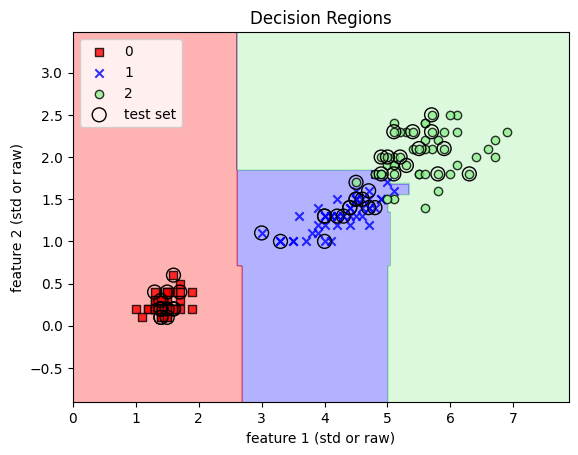

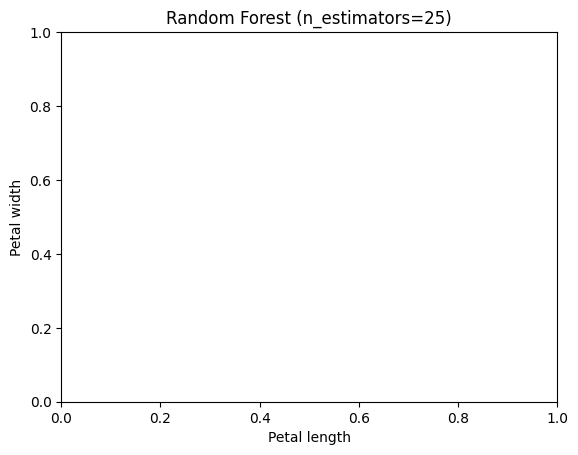

Feature Importances: [0.52140135 0.47859865]
Random Forest (100 trees) Accuracy: 0.9777777777777777
Random Forest OOB score: 0.9428571428571428


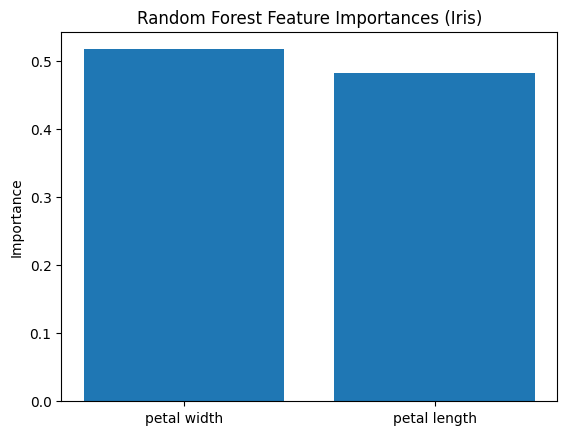

In [16]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2).fit(X_train, y_train)
print('Random Forest (25 trees) Accuracy:', accuracy_score(y_test, forest.predict(X_test)))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length'); plt.ylabel('Petal width')
plt.title('Random Forest (n_estimators=25)')
plt.savefig('rf_iris_25trees_regions.png', dpi=150, bbox_inches='tight')
plt.show()

print('Feature Importances:', forest.feature_importances_)


forest_oob = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1,
                                    n_jobs=2, oob_score=True, bootstrap=True).fit(X_train, y_train)
print('Random Forest (100 trees) Accuracy:', accuracy_score(y_test, forest_oob.predict(X_test)))
print('Random Forest OOB score:', forest_oob.oob_score_)


plt.figure()
importances = forest_oob.feature_importances_
indices = np.argsort(importances)[::-1]
labels = np.array(['petal length','petal width'])[indices]
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), labels, rotation=0)
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Iris)')
plt.savefig('rf_iris_feature_importances.png', dpi=150, bbox_inches='tight')
plt.show()

## 9) Exercise 8 — K-Nearest Neighbors
Concepts: lazy learning, distance metrics, bias–variance via `n_neighbors`.

KNN (k=5, Euclidean) Accuracy: 1.0


/tmp/ipython-input-3773836244.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


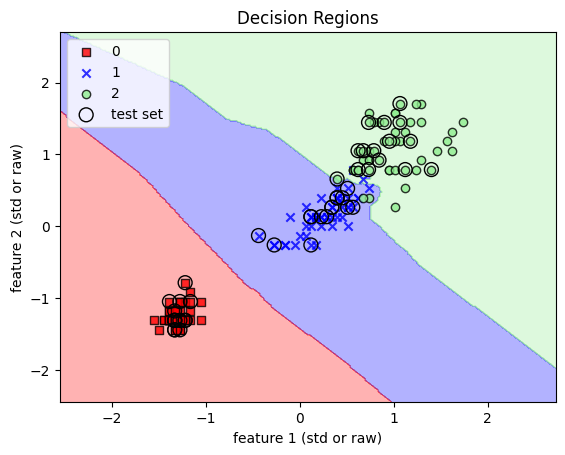

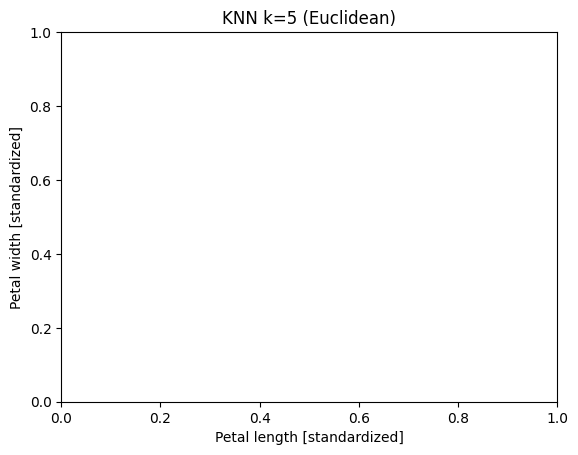

k=1  Euclidean -> acc=0.978
k=5  Euclidean -> acc=1.000
k=10 Euclidean -> acc=0.978
k=5 Manhattan -> acc= 0.9777777777777777


In [17]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski').fit(X_train_std, y_train)
print('KNN (k=5, Euclidean) Accuracy:', accuracy_score(y_test, knn.predict(X_test_std)))
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(X_train_std), len(X_combined_std)))
plt.xlabel('Petal length [standardized]'); plt.ylabel('Petal width [standardized]')
plt.title('KNN k=5 (Euclidean)')
plt.savefig('knn_iris_k5.png', dpi=150, bbox_inches='tight')
plt.show()

for k in [1,5,10]:
    clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski').fit(X_train_std, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test_std))
    print(f'k={k:<2} Euclidean -> acc={acc:.3f}')
manhattan = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski').fit(X_train_std, y_train)
print('k=5 Manhattan -> acc=', accuracy_score(y_test, manhattan.predict(X_test_std)))

## 10) Exercise 9 — Hyperparameter Tuning & Model Comparison


In [18]:

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('SVC GridSearch best params:', grid.best_params_)
print('SVC GridSearch best CV score:', grid.best_score_)


grid_lr = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=500),
                       {'C':[0.01, 0.1, 1, 10, 100]}, cv=5)
grid_lr.fit(X_train_std, y_train)
print('LogReg GridSearch best params:', grid_lr.best_params_)
print('LogReg GridSearch best CV score:', grid_lr.best_score_)


grid_knn = GridSearchCV(KNeighborsClassifier(),
                        {'n_neighbors':[1,3,5,7,9,11], 'p':[1,2]}, cv=5)
grid_knn.fit(X_train_std, y_train)
print('KNN GridSearch best params:', grid_knn.best_params_)
print('KNN GridSearch best CV score:', grid_knn.best_score_)

SVC GridSearch best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC GridSearch best CV score: 0.9619047619047618
LogReg GridSearch best params: {'C': 100}
LogReg GridSearch best CV score: 0.9523809523809523


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

KNN GridSearch best params: {'n_neighbors': 5, 'p': 1}
KNN GridSearch best CV score: 0.961904761904762


In [19]:

models = {
    'Perceptron': ppn,
    'LogReg': lr,
    'Linear SVM': svm,
    'RBF SVM (GS best)': grid.best_estimator_,
    'Decision Tree': tree,
    'Random Forest (100)': forest_oob,
    'KNN (k=5)': knn
}

rows = []
for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest (100)']:
        yhat = model.predict(X_test)
    else:
        yhat = model.predict(X_test_std)
    rows.append({'Model': name, 'Test Accuracy': accuracy_score(y_test, yhat)})

df_results = pd.DataFrame(rows).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
df_results

,Model,Test Accuracy
0,KNN (k=5),1.000000
1,LogReg,0.977778
2,Perceptron,0.977778
3,Linear SVM,0.977778
4,RBF SVM (GS best),0.977778
5,Decision Tree,0.977778
6,Random Forest (100),0.977778


In [20]:

ppn_moons = ppn_m
svm_rbf_moons = svm_rbf
knn_moons = KNeighborsClassifier(n_neighbors=5, p=2).fit(Xm_train_std, ym_train)

rows_m = []
for name, model in [('Perceptron', ppn_moons), ('RBF SVM', svm_rbf_moons), ('KNN k=5', knn_moons)]:
    yhat = model.predict(Xm_test_std)
    rows_m.append({'Model': name, 'Moons Test Accuracy': accuracy_score(ym_test, yhat)})
pd.DataFrame(rows_m).sort_values('Moons Test Accuracy', ascending=False).reset_index(drop=True)

,Model,Moons Test Accuracy
0,KNN k=5,0.900000
1,RBF SVM,0.833333
2,Perceptron,0.588889


from matplotlib import pyplot as plt
_df_0['Moons Test Accuracy'].plot(kind='hist', bins=20, title='Moons Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Moons Test Accuracy'].plot(kind='line', figsize=(8, 4), title='Moons Test Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Moons Test Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

---
## Discussion Prompts

- **Regularization & C (LogReg/SVM):** Smaller C ⇒ stronger regularization ⇒ simpler boundaries (lower variance, higher bias). Large C ⇒ complex boundary (risk overfitting).
- **Gamma (RBF):** Low gamma underfits (smooth boundary), very high gamma overfits (wiggly boundary).
- **Linear vs Nonlinear:** Iris (2D petal features) is close to linearly separable; moons is not. Kernel methods/trees/forests handle nonlinear structure.
- **Ensembles vs Simple Models:** Trees are high-variance; forests bag many trees to reduce variance and improve generalization.
- **KNN Bias–Variance:** Small k can fit noise (low bias/high variance); large k oversmooths (high bias/low variance).
- **No Free Lunch:** Pick models based on data characteristics + validation.
